# I-94 TRAFFIC DATASET

In this project, we're going to analyze a dataset about the westbound traffic on the [I-94 Interstate high way](https://en.wikipedia.org/wiki/Interstate_94)  
The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

[Dataset url](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)  
[More information](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)  


## Attribute information:
- holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp Numeric Average temp in kelvin
- rain_1h Numeric Amount in mm of rain that occurred in the hour
- snow_1h Numeric Amount in mm of snow that occurred in the hour
- clouds_all Numeric Percentage of cloud cover
- weather_main Categorical Short textual description of the current weather
- weather_description Categorical Longer textual description of the current weather
- date_time DateTime Hour of the data collected in local CST time
- traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [27]:
import pandas as pd
traffic = pd.read_csv('traffic.csv')

# Examine the first five rows
print(traffic.head())

# Examine the last five rows
print(traffic.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [28]:
# Information
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48204 rows and 9 columns  
There is no null values at all  
Time period: from 2012-10-02 09:00:00 to 2018-09-30 23:00:00

## Analyzing Traffic Volume

(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <BarContainer object of 10 artists>)

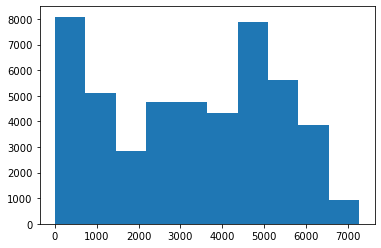

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(traffic['traffic_volume'])

In [30]:
# a few statistics about the traffic_volume column
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- The traffic volume ranges from 0 to 7280 cars with an average of 3259.8
- About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more)
- Because mean and 50% are almost equal so, **in one day, the amount of traffic at peak times can be 4 times higher than normal**
- Daytime and nighttime might influence the traffic volume

## Traffic Volume: Day vs .Night

In [31]:
# Transform the date_time column to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [32]:
import datetime as dt

traffic['hour'] = traffic['date_time'].dt.hour
traffic['month'] = traffic['date_time'].dt.month
traffic['year'] = traffic['date_time'].dt.year
traffic['day_of_week'] = traffic['date_time'].dt.dayofweek

- 4 new columns are added by splitting information of the date_time column

In [33]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   hour                 48204 non-null  int64         
 10  month                48204 non-null  int64         
 11  year                 48204 non-null  int64         
 12  day_of_week          48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3

- Let divide the dataset by day and night, each part lasts 12 hours:
    - daytime starts from 7 a.m to 7 p.m
    - nighttime starts from 7 p.m to 7 a.m of next day

In [34]:
traffic_day = traffic.loc[(traffic['hour'] >= 7) & (traffic['hour'] <= 19)]
traffic_night = traffic.loc[(traffic['hour'] >=  19) | (traffic['hour'] <= 7)]

In [35]:
print("Shape of daytime dataset:", traffic_day.shape)
print("Shape of nighttiem dataset:",traffic_night.shape)

Shape of daytime dataset: (25838, 13)
Shape of nighttiem dataset: (26406, 13)


- The number of rows of the two dataframe is not equal. This is unusual because both of dataset has 12 hours.
- **Maybe some data is missing**

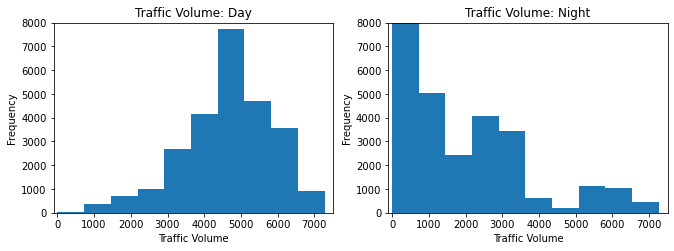

In [51]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(traffic_day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(traffic_night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()



- Daytime traffic is higher than nighttime. Regularly reaching the milestone of approximately 5.000 cars
- Nighttime traffic usually has less than 1.000 - 1.500 cars on the road
- Daytime hist has likely symmetrical distribution
- Nighttime hist has right skewed distribution

In [37]:
traffic_day['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [38]:
traffic_night['traffic_volume'].describe()

count    26406.000000
mean      2018.015375
std       1713.201969
min          0.000000
25%        581.000000
50%       1485.000000
75%       2934.000000
max       7260.000000
Name: traffic_volume, dtype: float64

- Focus on values of 25%, 50%, and 75% of both dataset:
    - In daytime, the traffic volume is distributed fairly evenly for all hours. That is, there is always an equal number of cars on the road
    - In nighttime, the traffic volumn is distributed is unevenly. There are sudden changes at times
- The traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward

## Time Indicators
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

- Month
- Day of the week
- Time of day

In [39]:
by_month = traffic_day.groupby('month').mean()
by_month['traffic_volume']

month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

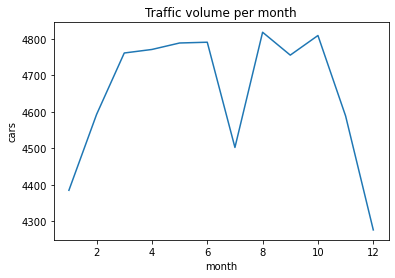

In [40]:
by_month['traffic_volume'].plot.line()
plt.title('Traffic volume per month')
plt.ylabel('cars')
plt.show()

- The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

- To answer the last question, let's see how the traffic volume changed each year in July.

In [41]:
by_dayofweek = traffic_day.groupby('day_of_week').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

day_of_week
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

C:\Users\dpn\AppData\Local\Temp\ipykernel_6132\3514833169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_day['year'] = traffic_day['date_time'].dt.year


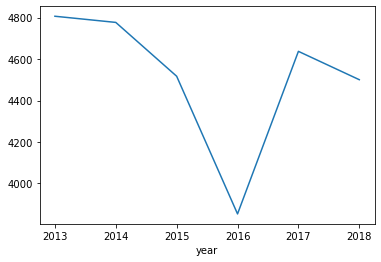

In [52]:
traffic_day['year'] = traffic_day['date_time'].dt.year
only_july = traffic_day[traffic_day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

- Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

- As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time Indicators (II)
Let's now look at a more granular indicator: day number.



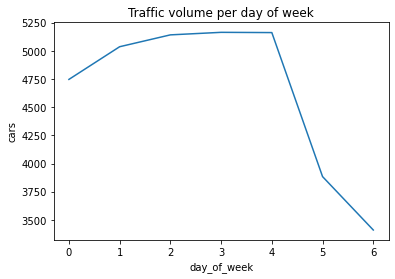

In [42]:
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic volume per day of week')
plt.ylabel('cars')
plt.show()

- The traffic volume is significantly heavier on business days compared to the weekends
- The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend

In [43]:
traffic_day['date_time'].dt.hour
bussiness_days = traffic_day.copy()[traffic_day['day_of_week'] <= 4] # 4 == Friday
weekend = traffic_day.copy()[traffic_day['day_of_week'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

## Time Indicators (III)
Let's now see what values we have based on time of the day. The weekends, however, will drag down the average values, so we're going to look only at the averages separately.



- We split the dataset so we can focus on plotting the graphs by bussiness and weekend day

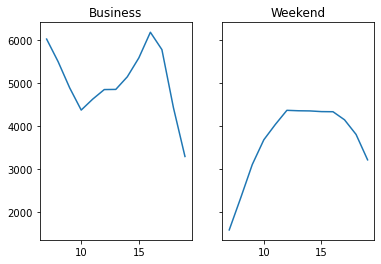

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey=True)
ax1.set_title('Business')
ax2.set_title('Weekend')
ax1.plot(by_hour_business['traffic_volume'])
ax2.plot(by_hour_weekend['traffic_volume'])
plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.

## Weather Indicators

In [45]:
traffic.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

temp          0.130299
rain_1h       0.004714
snow_1h       0.000733
clouds_all    0.067054
Name: traffic_volume, dtype: float64

All correlation between traffic_volume and the numerical weather column are low so we didn't find any reliable indicator of heavy traffic

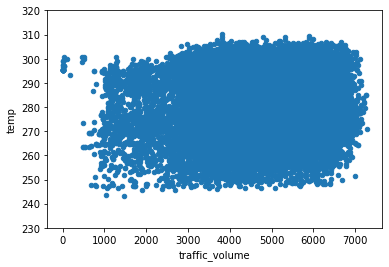

In [53]:
traffic_day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

- We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

- Let's now look at the other weather-related columns: weather_main and weather_description.

## Weahter Types

In [46]:
by_weather_main = traffic_day.groupby('weather_main').mean()
by_weather_description = traffic_day.groupby('weather_description').mean()

In [47]:
by_weather_description.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,year,day_of_week
weather_description,,,,,,,,,
SQUALLS,296.730000,1.020000,0.0,75.000000,4211.000000,14.000000,7.000000,2016.000000,2.000000
Sky is Clear,293.352292,0.000000,0.0,0.000000,4802.848812,12.976242,7.557235,2014.715983,2.896328
broken clouds,282.400504,0.000000,0.0,72.613417,4715.715045,13.259382,6.672202,2015.264364,2.978080
drizzle,283.627331,0.143633,0.0,88.578778,4572.176849,12.472669,7.167203,2015.816720,2.977492
few clouds,284.589033,0.000000,0.0,19.396787,4720.890763,13.155020,6.183936,2015.132530,2.975904


In [48]:
by_weather_main.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,year,day_of_week
weather_main,,,,,,,,,
Clear,283.884100,0.000000,0.000000,1.676447,4661.666879,12.958539,6.492107,2015.609791,3.143518
Clouds,282.971967,0.000000,0.000000,62.700890,4746.375927,13.386734,6.391820,2015.321784,2.999894
Drizzle,284.432372,0.168234,0.000000,84.781609,4712.699060,12.825496,7.074190,2015.895507,2.921630
Fog,277.378271,0.157739,0.001356,66.281915,4298.933511,10.648936,6.625000,2015.803191,2.827128
Haze,275.726381,0.060947,0.000000,63.916667,4545.434932,12.780822,5.873288,2015.567352,2.748858


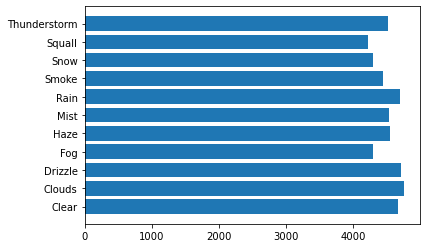

In [49]:
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.show()

All weather type  have pretty similar traffic volume. There is no traffic volume exceeding 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification

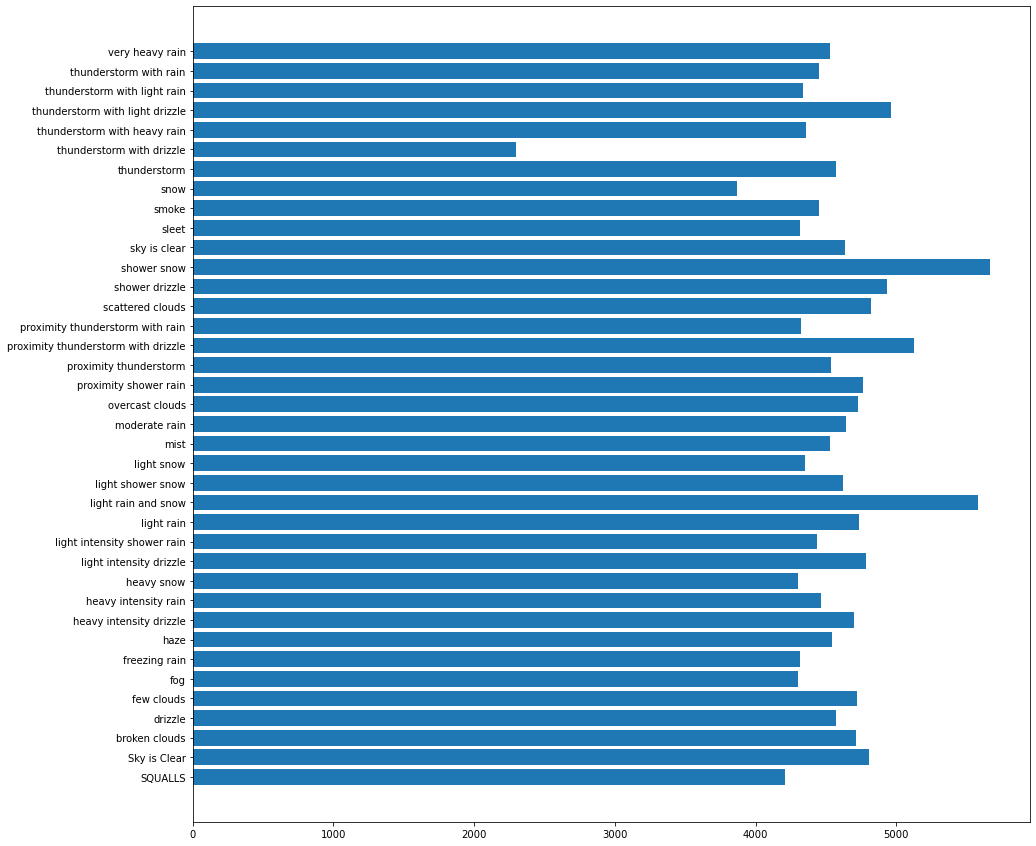

In [50]:
plt.figure(figsize=(15,15))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle  

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle

## Further steps
- Use the nighttime data to look for heavy traffic indicators.
- Find more time and weather indicators.